In [ ]:
#【質問内容】
#MINをパーシャルアウトしたPTSとASの偏相関係数と、
#MINでPTSとASをそれぞれ単回帰した時の残差の単純相関係数が
#（ほぼ）一致することは分かりました。

#そこで、MINをパーシャルアウトした時のPTSとASの散布図を描きたい時は、
#MINでPTSとASをそれぞれ単回帰した時の残差同士をプロットする、
#でよろしいでしょうか？

In [139]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [140]:
#データの読み込み
#stats_202021.csvはB1_2020-21シーズンの平均スタッツ
stats=pd.read_csv("stats_202021.csv")

In [141]:
#選手の平均スタッツを計算する
stats=stats.groupby("Player").mean()
stats=stats.reset_index()

In [142]:
#偏相関係数を算出したい列だけ残す
stats=stats.loc[:,["Player","MIN","PTS","AS"]]

In [143]:
#相関行列を出力
stats.drop("Player",axis=1).corr()

,MIN,PTS,AS
MIN,1.000000,0.886114,0.706624
PTS,0.886114,1.000000,0.618049
AS,0.706624,0.618049,1.000000


In [144]:
#偏相関係数を算出する準備として、PTS,ASの相関係数を保存しておく
r_pts_as=stats["PTS"].corr(stats["AS"])

In [145]:
#偏相関係数を算出する準備として、PTS,TR,AS,TOとMINの相関係数を保存しておく
r_min_pts=stats["MIN"].corr(stats["PTS"])
r_min_as=stats["MIN"].corr(stats["AS"])

In [146]:
#偏相関係数の算出
#PTSとAS
(r_pts_as-(r_min_pts*r_min_as))/(np.sqrt(1-r_min_pts**2)*np.sqrt(1-r_min_as**2))

-0.024701831668187423

In [147]:
#MINによる回帰分析で残差を作る
#まずはMINでPTSを回帰した残差を求める
#モデルの当てはめ
model_pts_min=LinearRegression()
x=stats[["MIN"]]
y=stats[["PTS"]]
model_pts_min.fit(x,y)
#予測値の算出
pred=model_pts_min.predict(stats[["MIN"]])
#残差を計算
res=[]
for r,p in zip(stats["PTS"],pred):
    res.append(r-p)
    
stats["Res_pts_min"]=pd.DataFrame(res)

In [148]:
#MINによる回帰分析で残差を作る
#まずはMINでASを回帰した残差を求める
#モデルの当てはめ
model_as_min=LinearRegression()
x=stats[["MIN"]]
y=stats[["AS"]]
model_as_min.fit(x,y)
#予測値の算出
pred=model_as_min.predict(stats[["MIN"]])
#残差を計算
res=[]
for r,p in zip(stats["AS"],pred):
    res.append(r-p)
    
stats["Res_as_min"]=pd.DataFrame(res)

In [149]:
#MINで回帰した時の残差が偏相関係数と一致するか調べる
stats["Res_pts_min"].corr(stats["Res_as_min"])

-0.02470183166818581

In [150]:
#残差同士の相関
#-0.024701831668185764

#定義式に沿った計算結果
#-0.024701831668186375

#残差同士の相関と偏相関係数はほぼ一致することが分かった。

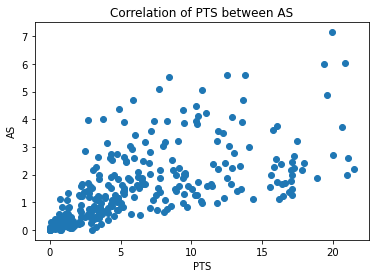

In [151]:
#単純相関係数の可視化
plt.plot(stats["PTS"],stats["AS"],"o")
plt.xlabel("PTS")
plt.ylabel("AS")
plt.title("Correlation of PTS between AS")
plt.show()

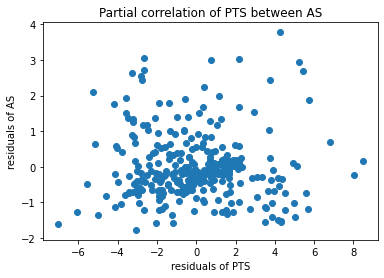

In [152]:
#偏相関係数の可視化
plt.plot(stats["Res_pts_min"],stats["Res_as_min"],"o")
plt.xlabel("residuals of PTS")
plt.ylabel("residuals of AS")
plt.title("Partial correlation of PTS between AS")
plt.show()